# <font color='blue'>Capstone Project Title: Predictive Maintenance For Machine

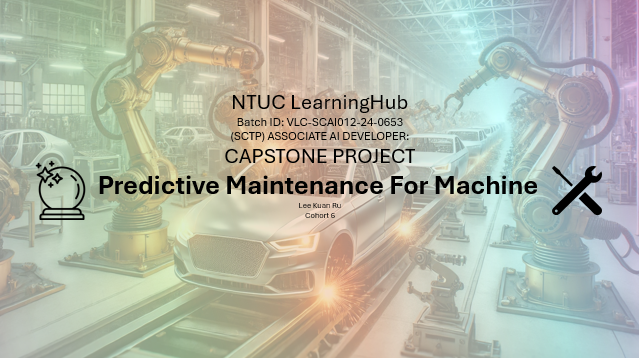

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Import the sklearn modules to be used
from sklearn.model_selection import train_test_split # To split the dataset for training and testing
from sklearn import metrics # To check the model's prediction accuracy

## <font color='blue'>Import and review data.

In [48]:
df = pd.read_csv(r'C:\Dataset\UC Irvine\AI4I 2020 Predictive Maintenance Dataset\ai4i2020.csv')
df.tail()

,UDI,Product ID,Type,Air Temperature [K],Process Temperature [K],Rotational Speed [rpm],Torque [Nm],Tool Wear [min],Machine Failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


Source of data: [UC Irvine Machine Learning Repository - AI4I 4040 Predictive Maintenance Dataset](http://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset)

In [50]:
df.shape

(10000, 14)

In [51]:
# Check if there is any null value.
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air Temperature [K]        0
Process Temperature [K]    0
Rotational Speed [rpm]     0
Torque [Nm]                0
Tool Wear [min]            0
Machine Failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [52]:
# Statistically summarize the data

df.describe()

,UDI,Air Temperature [K],Process Temperature [K],Rotational Speed [rpm],Torque [Nm],Tool Wear [min],Machine Failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00180
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04239
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air Temperature [K]      10000 non-null  float64
 4   Process Temperature [K]  10000 non-null  float64
 5   Rotational Speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool Wear [min]          10000 non-null  int64  
 8   Machine Failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [54]:
# Drop the "UDI" and "Product ID" columns.
df = df.drop("UDI", axis = 1)
df = df.drop("Product ID", axis = 1)

## <font color='blue'>Data Visualization

<Axes: xlabel='Air Temperature [K]', ylabel='Density'>

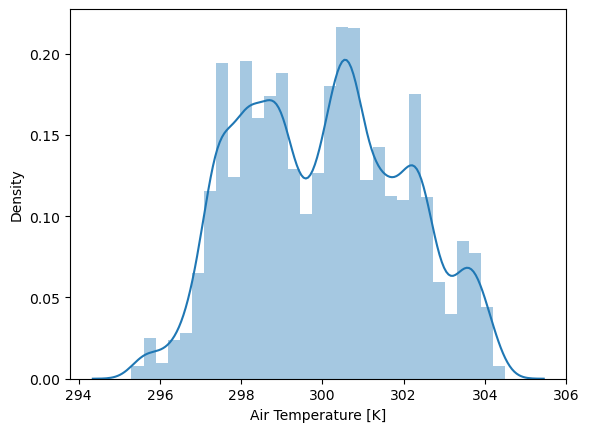

In [56]:
sns.distplot(df['Air Temperature [K]'])

<Axes: xlabel='Process Temperature [K]', ylabel='Density'>

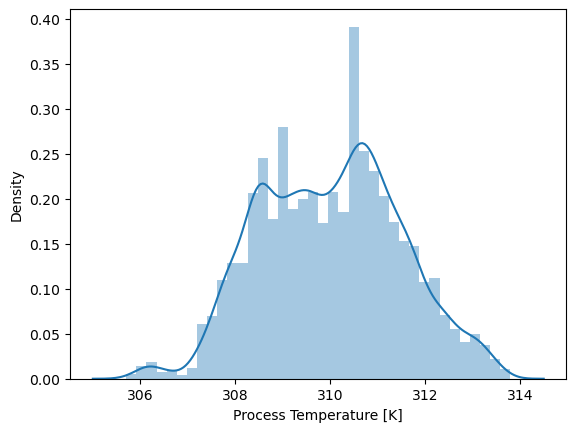

In [57]:
sns.distplot(df['Process Temperature [K]'])

<Axes: xlabel='Rotational Speed [rpm]', ylabel='Density'>

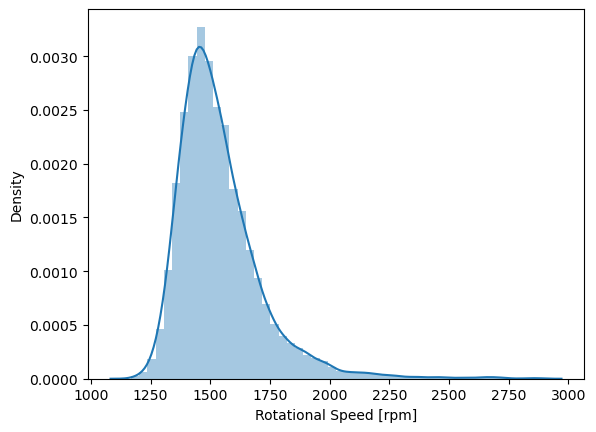

In [58]:
sns.distplot(df['Rotational Speed [rpm]'])

<Axes: xlabel='Torque [Nm]', ylabel='Density'>

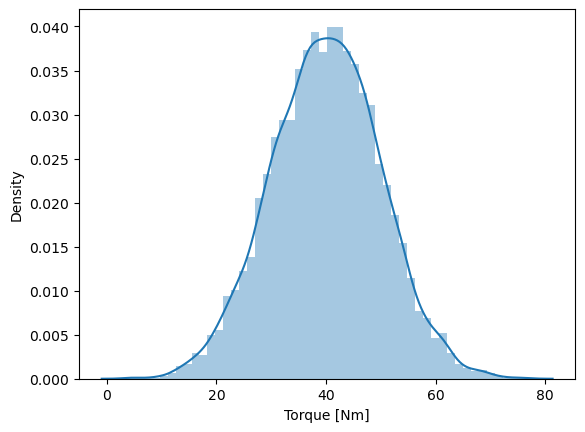

In [59]:
sns.distplot(df['Torque [Nm]'])

<Axes: xlabel='Tool Wear [min]', ylabel='Density'>

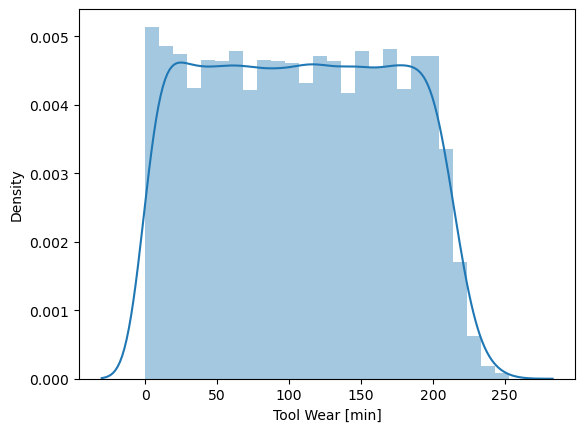

In [60]:
sns.distplot(df['Tool Wear [min]'])

<Axes: xlabel='Machine Failure', ylabel='Torque [Nm]'>

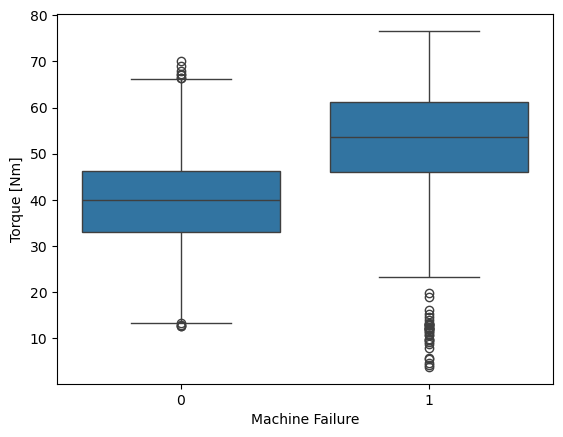

In [61]:
# Boxplot
sns.boxplot(x = "Machine Failure", y = "Torque [Nm]", data = df)

              precision    recall  f1-score   support

         HDF       0.91      0.91      0.91        22
     NotFail       0.99      1.00      0.99      1930
         OSF       0.73      0.50      0.59        16
         PWF       0.87      0.68      0.76        19
         RNF       0.00      0.00      0.00         4
         TWF       0.00      0.00      0.00         9

    accuracy                           0.98      2000
   macro avg       0.58      0.52      0.54      2000
weighted avg       0.98      0.98      0.98      2000



<Axes: xlabel='feature_importance', ylabel='feature_names'>

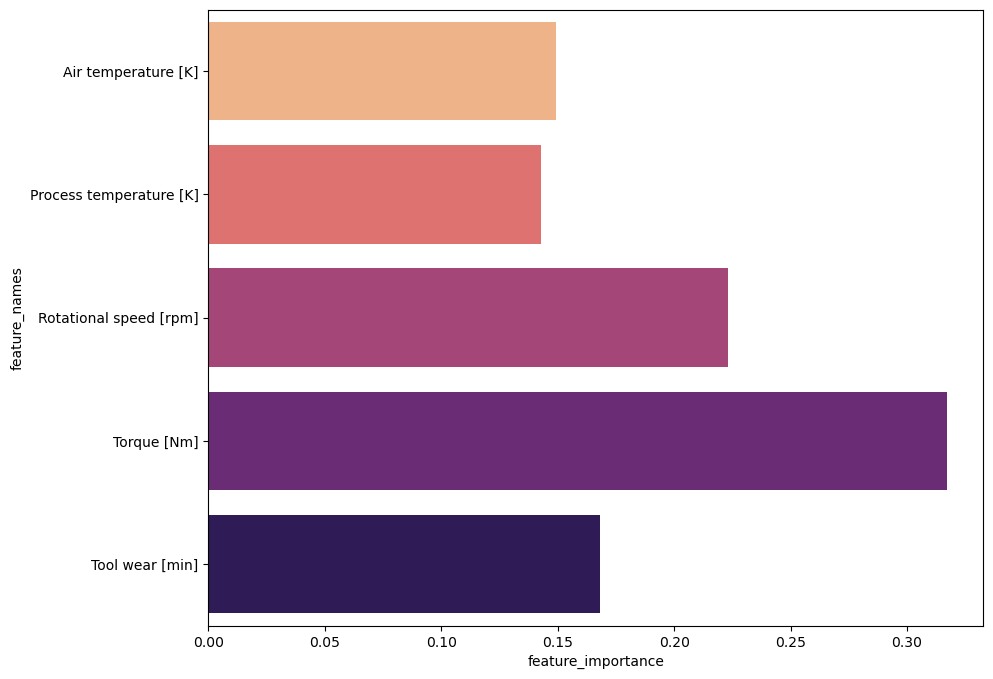

In [159]:
# Visualize the importance of each input feature

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the machine learning model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict and evaluate model
y_pred = rf_classifier.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Create the feature importance dataframe
feature_importance = np.array(rf_classifier.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names' : feature_names, 'feature_importance' : feature_importance})

plt.figure(figsize = (10,8))
sns.barplot(x = feat_imp['feature_importance'], y = feat_imp['feature_names'], palette= 'magma_r')

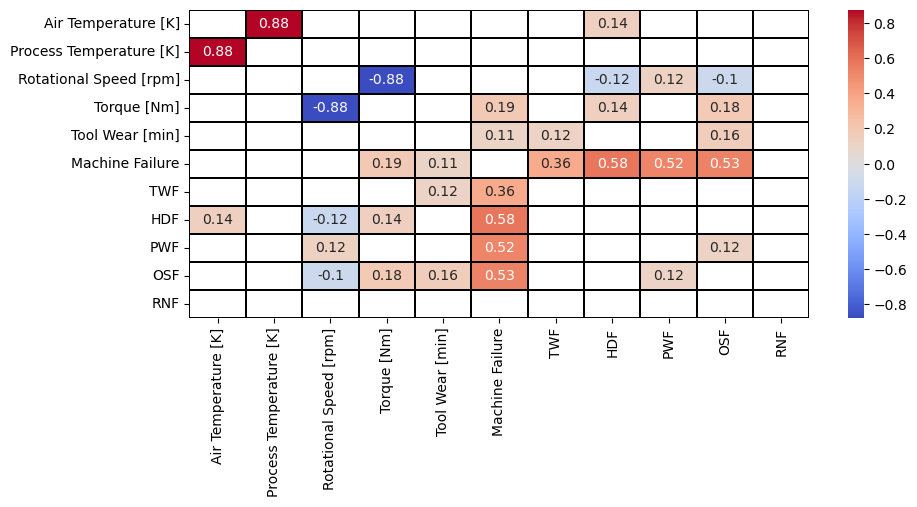

In [73]:
# Correlation Analysis
num_col = list()

for column in df:
    if df[column].dtype != "object":
        num_col.append(column)

new_df = df[num_col]

correl = new_df.corr()
filteredDf = correl[((correl > 0.09) | (correl < -0.09)) & (correl != 1.000)]

# Use a seaborn heatmap to see this better
plt.figure(figsize = (10,4))
sns.heatmap(filteredDf, annot = True, cmap = "coolwarm", linewidths = 0.1, linecolor = 'k')
plt.show()

The color themes available for "cmap" are at the [python graph gallery website](https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/).

In [75]:
new_df.corr().unstack().sort_values(ascending = False).drop_duplicates()

Air Temperature [K]      Air Temperature [K]        1.000000
                         Process Temperature [K]    0.876107
Machine Failure          HDF                        0.575800
                         OSF                        0.531083
PWF                      Machine Failure            0.522812
Machine Failure          TWF                        0.362904
                         Torque [Nm]                0.191321
OSF                      Torque [Nm]                0.183465
Tool Wear [min]          OSF                        0.155894
HDF                      Torque [Nm]                0.142610
                         Air Temperature [K]        0.137831
Rotational Speed [rpm]   PWF                        0.123018
PWF                      OSF                        0.115836
TWF                      Tool Wear [min]            0.115792
Tool Wear [min]          Machine Failure            0.105448
Torque [Nm]              PWF                        0.083781
Air Temperature [K]     

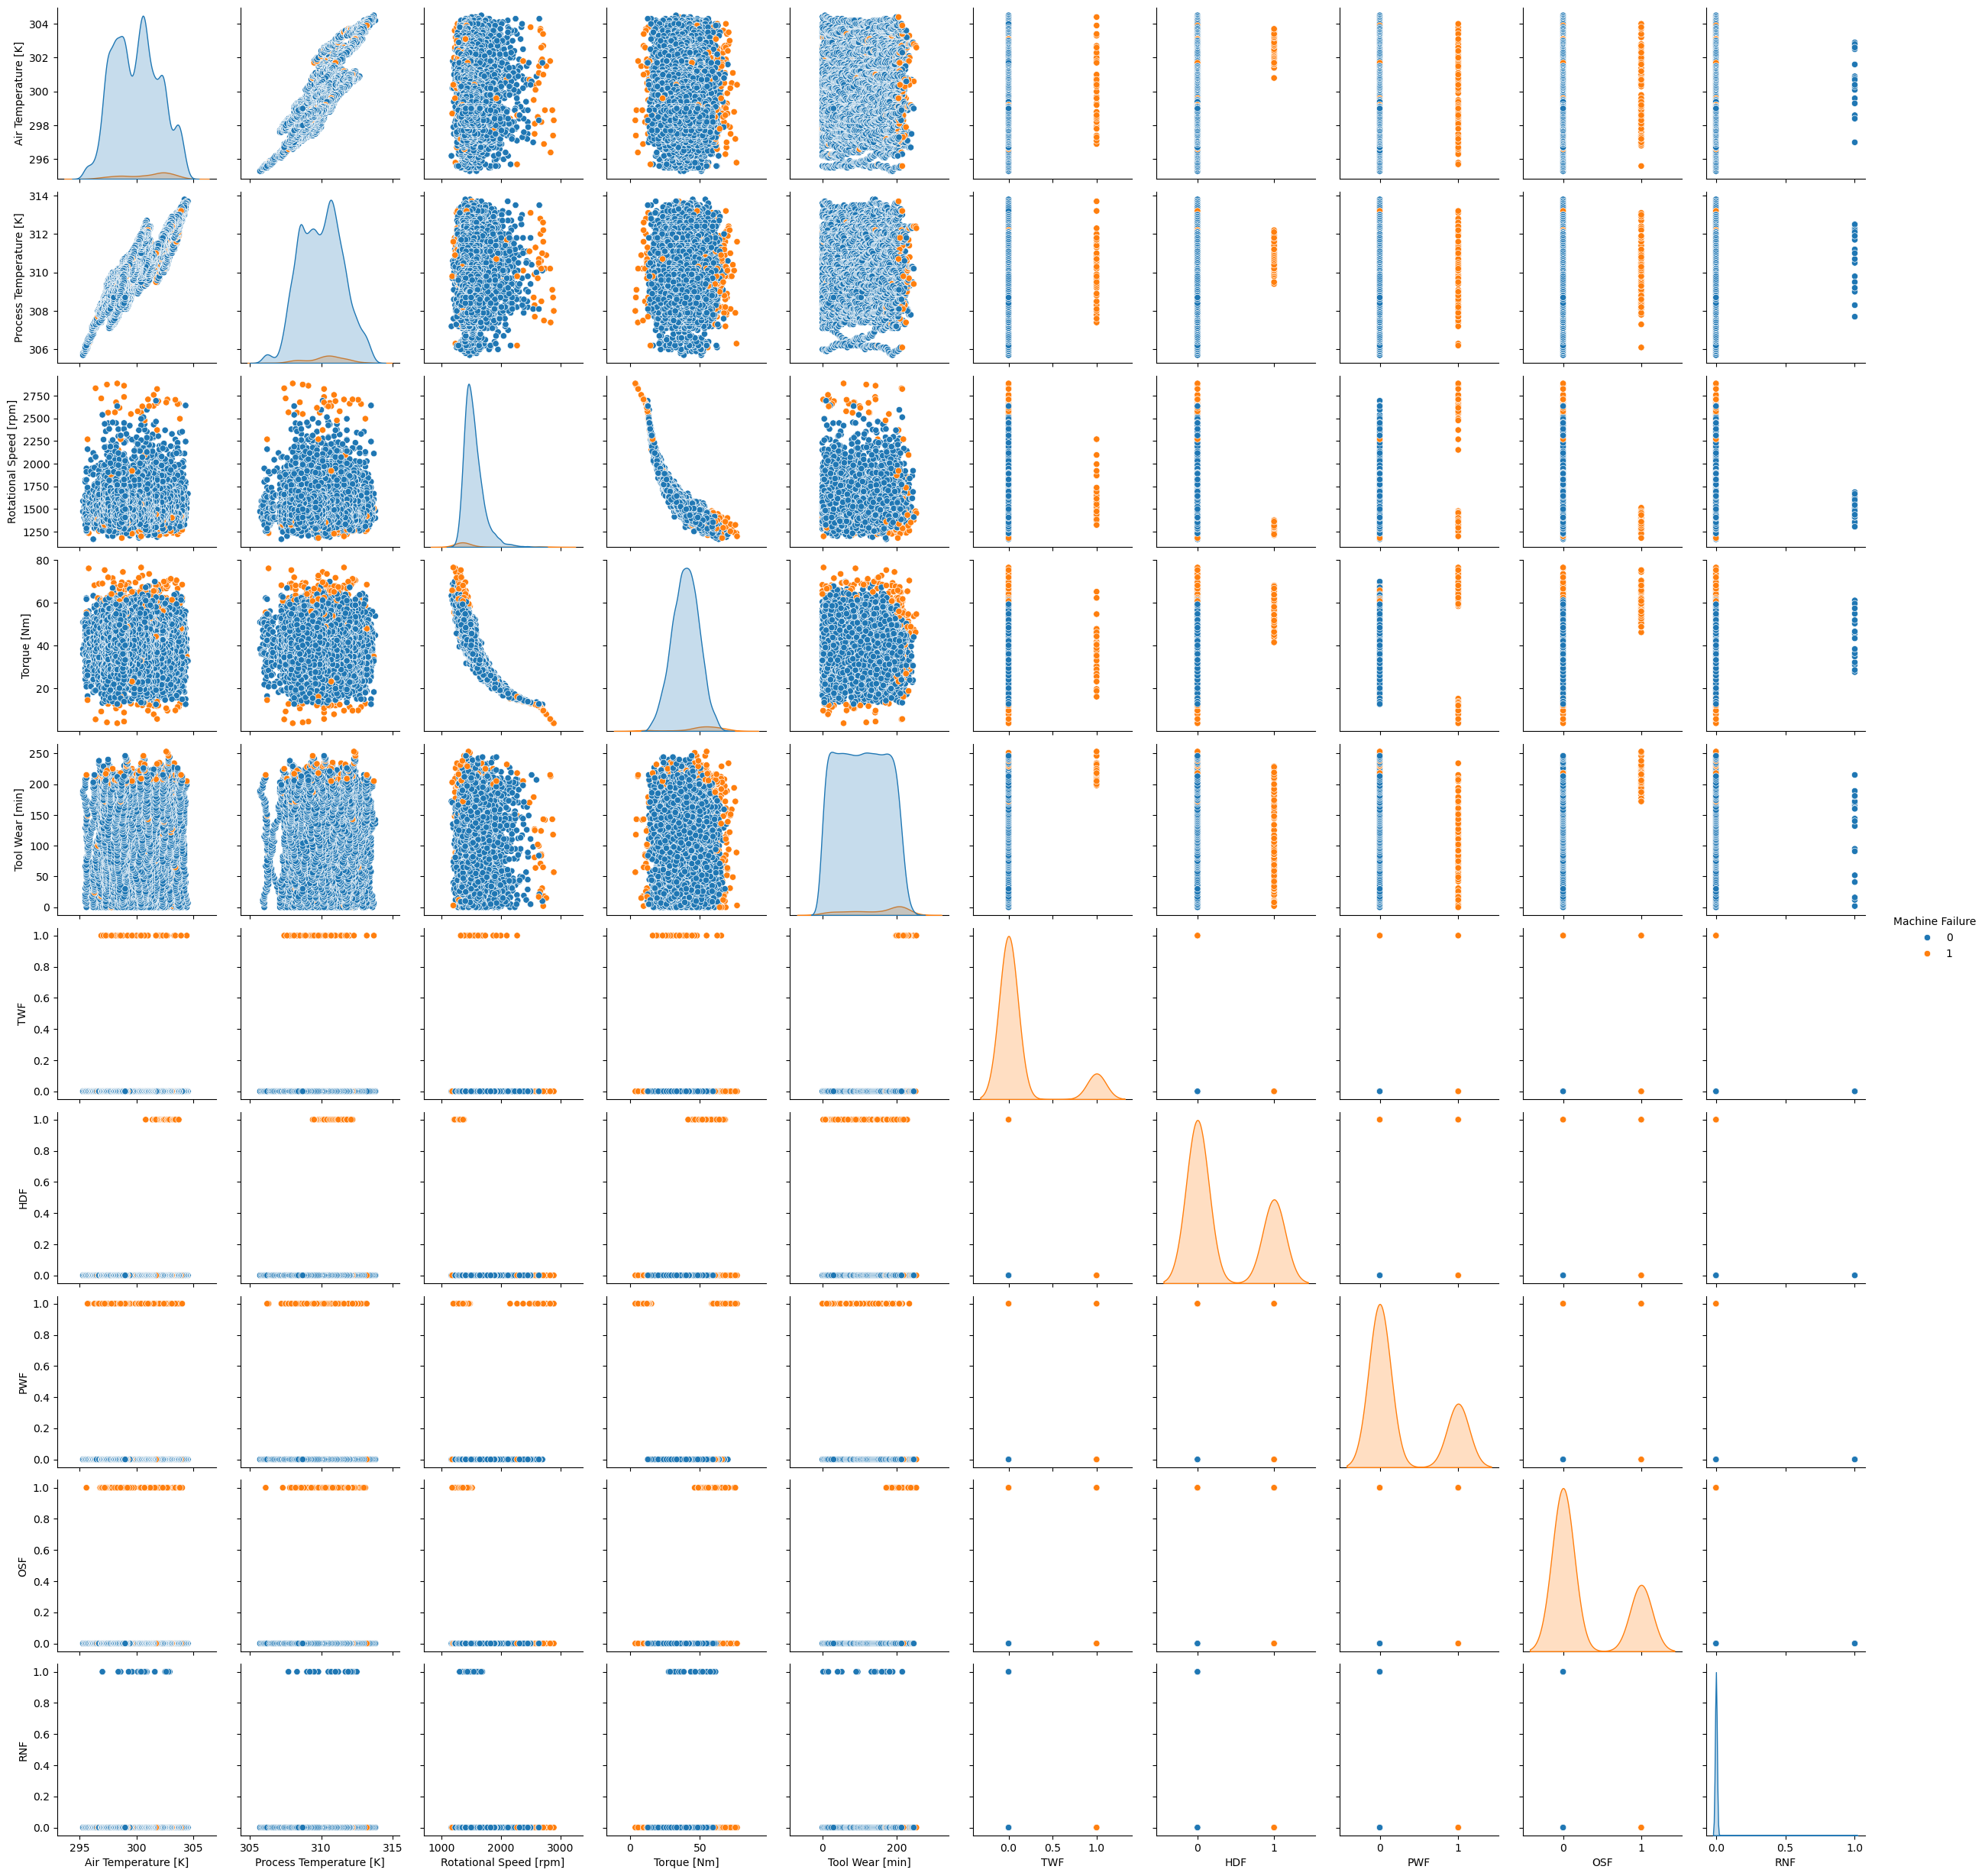

In [76]:
# Create pair plot of the columns
sns.pairplot(df, hue = 'Machine Failure');

In [77]:
# Using Support Vector Machine (SVM)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC  # Importing SVM
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Load the dataset
data = pd.read_csv(r'C:\Dataset\UC Irvine\AI4I 2020 Predictive Maintenance Dataset\ai4i2020_Categorized.csv')

# Preprocessing
# Define numerical and categorical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']

# Define preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

<Axes: xlabel='Machine Failure', ylabel='Torque [Nm]'>

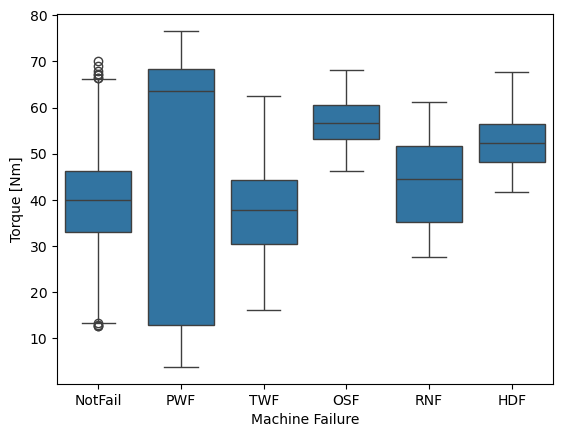

In [79]:
# Boxplot of Machine Failure vs Torque
sns.boxplot(x = "Machine Failure", y = "Torque [Nm]", data = data)

<Axes: xlabel='Machine Failure', ylabel='Process temperature [K]'>

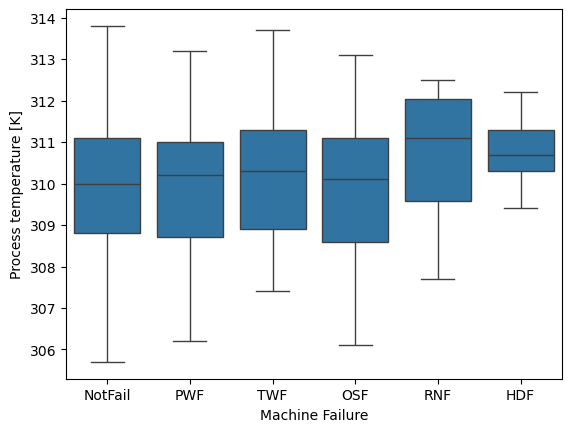

In [80]:
# Boxplot of Machine Failure vs Torque
sns.boxplot(x = "Machine Failure", y = "Process temperature [K]", data = data)

In [81]:
# Count the occurrences of each machine failure mode
counts = data['Machine Failure'].value_counts()
print(counts)

Machine Failure
NotFail    9652
HDF         112
PWF          95
OSF          78
TWF          45
RNF          18
Name: count, dtype: int64


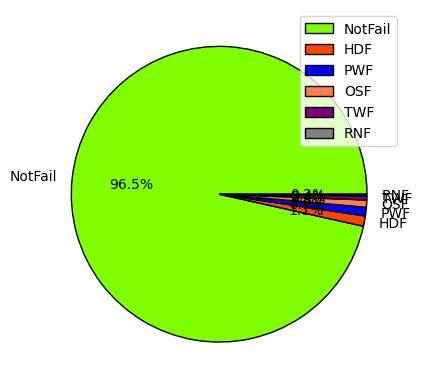

In [82]:
# Plot pie chart to view the failure mode of all data.
pie_chart = np.array([9652, 112, 95, 78, 45, 18])
pie_label = ['NotFail', 'HDF', 'PWF', 'OSF', 'TWF', 'RNF']
pie_color = ['Chartreuse', 'OrangeRed', 'Blue', 'Coral', 'Purple', 'Gray']

plt.pie(pie_chart, labels = pie_label, colors = pie_color, autopct = '%1.1f%%',
       startangle = 0,
       wedgeprops = {'edgecolor' : 'black',
                     'linewidth' : 1,
                     'antialiased' : True})
plt.legend()
plt.show()

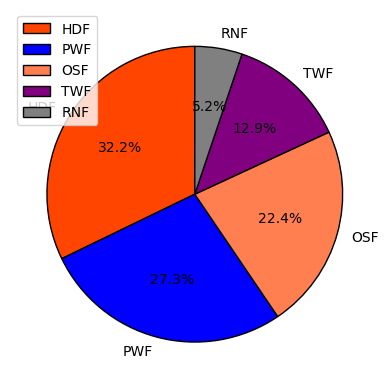

In [83]:
# Plot pie chart to view the proportion of each actual failure mode.
failpie_chart = np.array([112, 95, 78, 45, 18])
failpie_label = ['HDF', 'PWF', 'OSF', 'TWF', 'RNF']
failpie_color = ['OrangeRed', 'Blue', 'Coral', 'Purple', 'Gray']

plt.pie(failpie_chart, labels = failpie_label, colors = failpie_color, autopct = '%1.1f%%',
        startangle = 90,
        wedgeprops = {'edgecolor' : 'black',
                     'linewidth' : 1,
                     'antialiased' : True})
plt.legend()
plt.show()

## <font color='blue'> SVM Model, Y Not Stratified

In [85]:
# SVM Model, Y Not Stratified
# Define the SVM model pipeline
model = Pipeline(steps = [
   ('preprocessor', preprocessor),
   ('classifier', SVC(kernel = 'linear', random_state = 42)) # Using SVM with linear kernal
])

#SVC_model = SVC()

# Split the data into features and target variable
X = data.drop(['Machine Failure'], axis = 1)
y = data['Machine Failure']

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
print(X_train.shape)

(8000, 6)


In [88]:
print(X_test.shape)

(2000, 6)


In [89]:
# y_train = np.reshape(y_train, (-1, 1))
# y_test = np.reshape(y_test, (-1, 1))

In [90]:
print(y_train.shape)

(8000,)


In [91]:
print(y_test.shape)

(2000,)


In [92]:
# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

In [93]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of this SVM model is:", accuracy * 100, "%")

The accuracy of this SVM model is: 98.05 %


In [94]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         HDF       0.75      0.20      0.32        15
     NotFail       0.98      1.00      0.99      1935
         OSF       0.72      1.00      0.84        13
         PWF       0.94      0.75      0.83        20
         RNF       0.00      0.00      0.00         6
         TWF       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.57      0.49      0.50      2000
weighted avg       0.97      0.98      0.97      2000



In [95]:
# Verify the features and target variables
display(X.head())
display(y.head(3))

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


0    NotFail
1    NotFail
2    NotFail
Name: Machine Failure, dtype: object

Text(50.722222222222214, 0.5, 'Prediction')

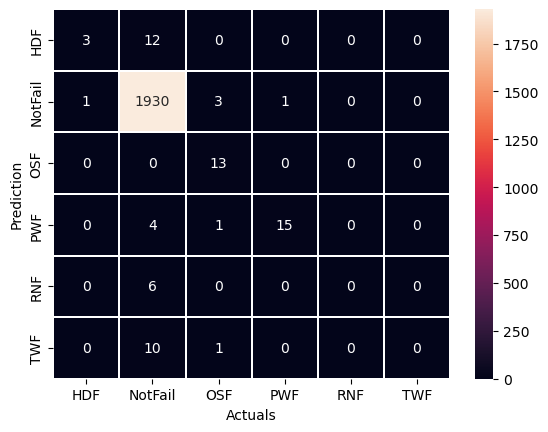

In [96]:
# Confusion Matrix
logConf = confusion_matrix(y_test, y_pred)
sns.heatmap(logConf, annot = True, fmt = 'd', cbar = True, linewidths = 0.1, linecolor = 'white',
            xticklabels = ['HDF', 'NotFail', 'OSF', 'PWF', 'RNF', 'TWF'],
            yticklabels = ['HDF', 'NotFail', 'OSF', 'PWF', 'RNF', 'TWF'])
plt.xlabel('Actuals')
plt.ylabel('Prediction')

## <font color='blue'> SVM Model, Y Stratified

In [98]:
# Split the data. This time, stratify y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print('Train Shape', X_train.shape)
print('Test Shape', X_test.shape)

Train Shape (8000, 6)
Test Shape (2000, 6)


In [99]:
# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Model evaluation for stratified Y
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of this SVM model (Y stratified) is:", accuracy * 100, "%")

The accuracy of this SVM model (Y stratified) is: 97.89999999999999 %


Text(50.722222222222214, 0.5, 'Prediction')

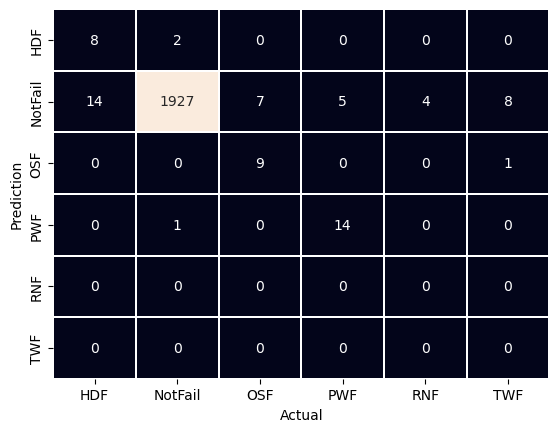

In [100]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot = True, fmt = 'd', cbar = False,  linewidths = 0.1, linecolor = 'white',
            xticklabels = ['HDF', 'NotFail', 'OSF', 'PWF', 'RNF', 'TWF'],
            yticklabels = ['HDF', 'NotFail', 'OSF', 'PWF', 'RNF', 'TWF'])
plt.xlabel('Actual')
plt.ylabel('Prediction')

Load dataset in different form to train by using KNN and LogisticRegression

In [102]:
NoTypedf = pd.read_csv(r'C:\Dataset\UC Irvine\AI4I 2020 Predictive Maintenance Dataset\ai4i2020_RemovedType.csv')
NoTypedf.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure
0,298.1,308.6,1551,42.8,0,NotFail
1,298.2,308.7,1408,46.3,3,NotFail
2,298.1,308.5,1498,49.4,5,NotFail
3,298.2,308.6,1433,39.5,7,NotFail
4,298.2,308.7,1408,40.0,9,NotFail


In [103]:
# Count the occurence of each failure category
display(NoTypedf['Machine Failure'].value_counts() / 10000 * 100) # Display the percentage of each failure mode

Machine Failure
NotFail    96.52
HDF         1.12
PWF         0.95
OSF         0.78
TWF         0.45
RNF         0.18
Name: count, dtype: float64

In [104]:
# Verify the features and target variables
X = NoTypedf.drop('Machine Failure', axis = 1)  # Including all columns as input excluding 'Machine Failure'.
y = NoTypedf[['Machine Failure']]  # Taking only 'Machine Failure' column as the output.
display(X.tail(3))
display(y.head(3))

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25
9999,299.0,308.7,1500,40.2,30


,Machine Failure
0,NotFail
1,NotFail
2,NotFail


In [105]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Verify the shape of train and test
print('Train Shape', X_train.shape)
print('Test Shape', X_test.shape)

Train Shape (8000, 5)
Test Shape (2000, 5)


## <font color='blue'> Logistic Regression, Y Not Stratified

In [107]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiating and training the model on training dataset and making prediction for the test data
log = LogisticRegression()
log.fit(X_train, y_train)
logPrediction = log.predict(X_test)
logAccuracy = metrics.accuracy_score(logPrediction, y_test)
print("The accuracy of logistic regression (Y not stratified) is:", logAccuracy * 100, "%")

The accuracy of logistic regression (Y not stratified) is: 96.7 %


## <font color='blue'> K Neighbors Classifier, Y Not Stratified

In [109]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)
KNNprediction = knn.predict(X_test)
knnAccuracy = metrics.accuracy_score(KNNprediction, y_test)
print("The accuracy of KNN model (Y not stratified) is:", knnAccuracy * 100, "%")

The accuracy of KNN model (Y not stratified) is: 96.65 %


As the proportion of "NotFail" is 96.52% which is very high, I try using "stratify = y" for the function to mind the Y proportion while splitting data.

In [111]:
# Introduce "stratify = y" into tain / test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print('Train Shape', X_train.shape)
print('Test Shape', X_test.shape)

Train Shape (8000, 5)
Test Shape (2000, 5)


In [112]:
# Print the total counts of unique values splitted into y_train data
print(y_train.value_counts())
print() # Printing a blank line for spacing.

print((y_train.value_counts() / 10000) * 100) # Divided by total no. of rows, then multiply by 100 to view percentage
print()

Machine Failure
NotFail            7722
HDF                  90
PWF                  76
OSF                  62
TWF                  36
RNF                  14
Name: count, dtype: int64

Machine Failure
NotFail            77.22
HDF                 0.90
PWF                 0.76
OSF                 0.62
TWF                 0.36
RNF                 0.14
Name: count, dtype: float64



In [113]:
# Printing the percentage of unique values splitted into the y_test data
print((y_test.value_counts() / 10000) * 100)

Machine Failure
NotFail            19.30
HDF                 0.22
PWF                 0.19
OSF                 0.16
TWF                 0.09
RNF                 0.04
Name: count, dtype: float64


In [114]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

## <font color='blue'> Logistic Regression, Y Stratified.

In [116]:
# Instantiating and training the model on training dataset and making prediction for the test data
log = LogisticRegression()
log.fit(X_train, y_train)
logPrediction = log.predict(X_test)
logAccuracy = metrics.accuracy_score(logPrediction, y_test)
print("The accuracy of logistic regression is:", logAccuracy * 100, "%")

The accuracy of logistic regression is: 96.45 %


In [117]:
# Attempt using K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## <font color='blue'> K Neighbors Classifier, Y Stratified.

In [119]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)
KNNprediction = knn.predict(X_test)
knnAccuracy = metrics.accuracy_score(KNNprediction, y_test)
print("The accuracy of KNN model is:", knnAccuracy * 100, "%")

The accuracy of KNN model is: 96.05 %


# <font color='blue'> Future Work

## When resource allows, a system that continuously monitor the input features on regular basis, so that the machine failure can be predicted upfront.

## Deploy the predictive model, then regularly monitor its accuracy.

# <font color='blue'> Conclusion

## The accuracy of this project's prediction model can be up to **98.05%**.

## This machine learning approach seems **suitable** in serving the predictive maintenance approach.

## It will be a **continuous effort** to use more data to train the model for further accuracy improvement.